# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 4

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1 - zakupy

W sklepie dostępne są następujące produkty:

| Produkt | Cena (netto) | Podatek |
| --- | --- | --- |
| Chleb | 3 | 5% |
| Butelka wody (1l) | 2 | 8% |
| Pomidor 1szt. | 2 | 5% |
| Olej (1l) | 6 | 5% |
| Szafran | 24.5 | 8% |
| Krewetki (opakowanie) | 20 | 23% |
| Lód (opakowanie) | 5 | 23% |


#### Zadanie 1 A

Zapisz:
- nazwy produktów w zmiennej `N`.
- ceny produktów w zmiennej `C`.
- stawki podatku w zmiennej `P`.

*(powyższe zmienne to tablice jednowymiarowe)*



In [1]:
import numpy as np
import matplotlib.pyplot as plt
###################
N = np.array(["Chleb", "Butelka wody (1l)", "Pomidor 1szt.", "Olej (1l)", "Szafran", "Krewetki (opakowanie)", "Lód (opakowanie)"])
C = np.array([3,2,2,6,24.5,20,5])
P = np.array([0.05, 0.08, 0.05, 0.05, 0.08, 0.23, 0.23])


#### Zadanie 1 B

Klient kupił:

- 2 szt. chleba, 
- 6 butelek wody,
- 1 opakowanie krewetek.

Zapisz zakupy klienta w wektorze `Z` (zachowaj wymiarowość) oraz kolejność produktów zgodnie z zad. 1A.

In [2]:
Z = np.array([2,6,0,0,0,1,0])


#### Zadanie 1 C

Oblicz sumę **netto** jaką klient musi zapłacić bez używania:
- operatora `+`, 
- funkcji/metody `sum`,
- operatora mnożenia skalarnego (`*`, `__mul__`).

_Podpowiedź: transponuj jeden z wektorów i wykorzystaj mnożenie macierzy._

In [3]:
Z_T = np.transpose(Z)
Suma = np.matmul(Z_T,C)

print("Cena: ",Suma.squeeze())

Cena:  38.0


#### Zadanie 1D

Oblicz wartość **brutto** jaką klient musi zapłacić w sklepie. 

* W tym zadaniu użyj operatora `*` do obliczenia cen brutto.
* Do obliczenia sumy użyj operatora mnożenia macierzy (podobnie jak w zad. 1C).
* Dodatkowo, wyświetl rachunek w postaci tabeli zawierającej kolumny: 
    - nazwa produktu,
    - cena netto, 
    - liczba sztuk, 
    - cena netto danej pozycji (cena netto x liczba sztuk), 
    - podatek (procentowo np. `5%`),
    - cena brutto danej pozycji. 

Na końcu tabeli ma się wyświetlić suma brutto do zapłaty.

**Oczekiwany wynik:**

```
Nazwa                       cena x szt.  netto   podatek   brutto
Chleb                       3.00 x 2      6.00        5%    ?????
Butelka wody (1l)           2.00 x 6     12.00        8%    ?????
Krewetki (opakowanie)      24.50 x 1     24.50       23%    ?????
=================================================================
Suma:                                                       ?????
```

_(w miejscu znaków zapytania powinny być wartości liczbowe)_

In [49]:
P_2D = P.reshape((len(P),1))
Z_2D = Z.reshape((len(Z),1))
C_2D = C.reshape((len(C),1))
Netto = Z*C
Podatek = Z*P*C
Brutto = Netto-Podatek

Netto = Netto.squeeze()
Brutto = Brutto.squeeze()
P = P.squeeze()
C = C.squeeze()
#Table

from prettytable import PrettyTable
Table = PrettyTable(["Nazwa", "cena x szt.", "netto", "podatek", "brutto"])
suma = 0
for i in range(len(P)):
    if Netto[i]>0:
        row = [N[i], f"{C[i]:.2f}", f"{round(Netto[i],2):.2f}", str(P[i])+ "%", f"{Brutto[i]:.2f}"]
        suma += round(Brutto[i],2)

        Table.add_row(row)

Table.add_row(["========","========","========","========","========"])
suma_list = ["Suma:","","","",suma]
Table.add_row(suma_list)

    
print(Table)






+----------+-------------+----------+----------+----------+
|  Nazwa   | cena x szt. |  netto   | podatek  |  brutto  |
+----------+-------------+----------+----------+----------+
|  maslo   |     8.00    |  16.00   |  0.21%   |  12.64   |
|  jajka   |    12.00    |  12.00   |  0.05%   |  11.40   |
| orzechy  |    21.00    |  21.00   |  0.05%   |  19.95   |
|  szynka  |     4.50    |  13.50   |  0.15%   |  11.47   |
| ======== |   ========  | ======== | ======== | ======== |
|  Suma:   |             |          |          |  55.47   |
+----------+-------------+----------+----------+----------+


### Zadanie 2

Zmodyfikuj kod z zadania pierwszego w ten sposób, że dane o produktach będą wczytywane z pliku `produkty.csv`, a dane do rachunku (liczba zakupionych produktów) z pliku `rachunek.csv`.

Utwórz przykładowe dane (inne niż w zadaniu 1). Minimum 5 produktów.


In [50]:
import pandas as pd
produkty = pd.read_csv('Produkty.csv')
rachunek = pd.read_csv('Rachunek.csv')

print(produkty)
print("------------------")
print(rachunek)

N = np.array(produkty["produkt"])    
P = np.array(produkty["podatek"])
P_2D = P.reshape((len(P),1))

C = np.array(produkty["cena"])
C_2D = C.reshape((len(C),1))

Z = np.array(rachunek["zakupy"])
Z_2D = Z.reshape((len(Z),1))


################
#Obliczenie zakupow i wyswietlenie tabeli
Netto = Z*C
Podatek = Z*P*C
Brutto = Netto-Podatek

Netto = Netto.squeeze()
Brutto = Brutto.squeeze()
P = P.squeeze()
C = C.squeeze()
#Table

from prettytable import PrettyTable
Table = PrettyTable(["Nazwa", "cena x szt.", "netto", "podatek", "brutto"])
suma = 0
for i in range(len(P)):
    if Netto[i]>0:
        row = [N[i], f"{C[i]:.2f}", f"{round(Netto[i],2):.2f}", str(P[i])+ "%", f"{Brutto[i]:.2f}"]
        suma += round(Brutto[i],2)
        
        Table.add_row(row)
        
Table.add_row(["========","========","========","========","========"])
suma_list = ["Suma:","","","",suma]
Table.add_row(suma_list)

print(Table)


   produkt  cena  podatek
0    mleko   4.0     0.13
1    maslo   8.0     0.21
2    jajka  12.0     0.05
3     olej  14.0     0.11
4  orzechy  21.0     0.05
5   szynka   4.5     0.15
------------------
   zakupy
0       0
1       2
2       1
3       0
4       1
5       3
+----------+-------------+----------+----------+----------+
|  Nazwa   | cena x szt. |  netto   | podatek  |  brutto  |
+----------+-------------+----------+----------+----------+
|  maslo   |     8.00    |  16.00   |  0.21%   |  12.64   |
|  jajka   |    12.00    |  12.00   |  0.05%   |  11.40   |
| orzechy  |    21.00    |  21.00   |  0.05%   |  19.95   |
|  szynka  |     4.50    |  13.50   |  0.15%   |  11.47   |
| ======== |   ========  | ======== | ======== | ======== |
|  Suma:   |             |          |          |  55.47   |
+----------+-------------+----------+----------+----------+


### Zadanie 3 - gra 2048

Dana jest kwadratowa plansza o boku `SIZE` (np. 4) dla znanej gry 2048 (https://2048game.com/pl/). 
Każdy wiersz zawiera od 0 do 4 liczb. Należy, z wykorzystaniem konstrukcji Numpy, zasymulować ruch w lewo, w prawo, w górę i w dół planszy zgodnie z regułami gry (ale **BEZ** dodawania nowego kafelka w losowym miejscu). Innymi słowy, trzeba napisać cztery funkcje: 
- `move_left(...)`, 
- `move_right(...)`, 
- `move_up(...)`, 
- `move_down(...)`.

Przykład ruchu w prawo:

Wejściem i wyjściem każdej z wymienionych funkcji jest 2-wymiarowa tablica Numpy.

> UWAGA: postaraj się napisać funkcję tylko do jednego ruchu, a pozostałe trzy niech się do niej w sprytny sposób odwołują.

#### Przykład ruchu w prawo:
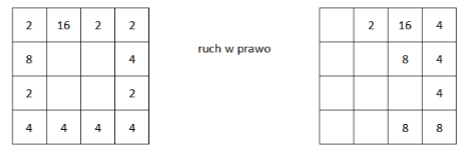

In [6]:
matrix = np.array([[2,16,2,2],
                   [8,0,0,4],
                   [2,0,0,2],
                   [4,4,4,4]])

def move_left(matrix):
    h,_ = np.shape(matrix)
    
    moved_matrix = []
    for i in range(h):
        #print("-------------------------------------------")
        #print("PROCESSING ROW",i)

        #Przemieszczenie do lewej strony
        row = matrix[i]
        new_row = []
        for r in row:
            if r!=0:
                new_row.append(r)
            else:
                pass
                
        #Check if there are any numbers to operate on in a row      
        if len(new_row)!=0:
            added_new_row = []
            #Add numbers
            i = 0
            was_row_added = False
            while i <= (len(new_row)-1):
                if i< len(new_row)-1:
                    if new_row[i] == new_row[i+1]:
                        added_new_row.append(new_row[i]+new_row[i+1])
                        #Skip next check so the number is not compared with already summed one
                        i+=1
                        was_row_added = True
                    else:
                        added_new_row.append(new_row[i])
                        was_row_added = False
    
                    i+=1
                else:
                    if was_row_added:
                        was_row_added = False
                    i+=1
    
            #If row was not added at all add to it its last element:
            if not was_row_added:
                added_new_row.append(new_row[-1])
            
            #Add zeros to fill gap
            for i in range(len(row)-len(added_new_row)):
                added_new_row.append(0)

        #If row is empty after moveing to left just fill with zero and move on
        else:
            added_new_row = [0,0,0,0]
        

        #Append new added row
        moved_matrix.append(added_new_row)


    #Transform rows to array again
    moved_matrix = np.array(moved_matrix)
    
    return moved_matrix

def move_right(matrix):
    #Flip horizontaly
    matrix = np.fliplr(matrix)
    #Move 'left'
    matrix = move_left(matrix)
    #Flip again"
    matrix = np.fliplr(matrix)
    
    return matrix
    
def move_up(matrix):
    #Transpose
    matrix = np.transpose(matrix)  
    #Move 'left'
    matrix = move_left(matrix)
    #Flip again"
    matrix = np.transpose(matrix)  
    
    return matrix
  
def move_down(matrix):
    #Transpose
    matrix = np.transpose(matrix)  
    #Move 'right'
    matrix = move_right(matrix)
    #Flip again"
    matrix = np.transpose(matrix)  
    
    return matrix


print("Original")
print(matrix)
print("-----------------------------")

m = move_right(matrix)
print("Right")
print(m)
print("-----------------------------")

m = move_down(m)
print("Down")
print(m)
print("-----------------------------")

m = move_right(m)
print("Right")
print(m)
print("-----------------------------")

m = move_up(m)
print("Up")
print(m)
print("-----------------------------")

m = move_right(m)
print("Right")
print(m)
print("-----------------------------")









Original
[[ 2 16  2  2]
 [ 8  0  0  4]
 [ 2  0  0  2]
 [ 4  4  4  4]]
-----------------------------
Right
[[ 0  2 16  4]
 [ 0  0  8  4]
 [ 0  0  0  4]
 [ 0  0  8  8]]
-----------------------------
Down
[[ 0  0  0  0]
 [ 0  0  0  4]
 [ 0  0 16  8]
 [ 0  2 16  8]]
-----------------------------
Right
[[ 0  0  0  0]
 [ 0  0  0  4]
 [ 0  0 16  8]
 [ 0  2 16  8]]
-----------------------------
Up
[[ 0  2 32  4]
 [ 0  0  0 16]
 [ 0  0  0  0]
 [ 0  0  0  0]]
-----------------------------
Right
[[ 0  2 32  4]
 [ 0  0  0 16]
 [ 0  0  0  0]
 [ 0  0  0  0]]
-----------------------------
